<a href="https://colab.research.google.com/github/ayandip18/project/blob/main/stockmarketprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Predictive Analytics for Stock Market Trends*

# Priject Outline

1. Data Collection
2. Preprocessing
3. Sentiment Analysis Integration
4. Feature Engineering
5. Model Training & Prediction
6. Evaluation & Visualization
7. Optional: Live/Streaming Data


## Install & Import

In [14]:
!pip install yfinance textblob scikit-learn matplotlib pandas --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

1️⃣ Data Collection

In [15]:
ticker = "AAPL"
df = yf.download(ticker, start="2018-01-01", end="2024-12-31")

# Example news headlines CSV (if available)
# news_df = pd.read_csv('news_headlines.csv', parse_dates=['Date'])

/tmp/ipython-input-15-2654012877.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


2️⃣ Preprocessing

In [16]:
# news_df['Date'] = news_df['Date'].dt.date
# news_daily = news_df.groupby('Date')['Headline'].apply(lambda x: ' '.join(x))
# news_daily = news_daily.reset_index()

3️⃣ Sentiment Analysis Integration

In [17]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Example merging sentiment with stock data (if headlines exist)
# news_daily['sentiment'] = news_daily['Headline'].apply(get_sentiment)
df['Date'] = df.index.date
df['sentiment'] = 0  # Placeholder if no news
data = df

4️⃣ Feature Engineering

In [18]:
data['MA10'] = data['Close'].rolling(10).mean()
data['MA20'] = data['Close'].rolling(20).mean()
data['Target'] = data['Close'].shift(-1)
data = data.dropna()

5️⃣ Model Training & Prediction

In [19]:
X = data[['Close','MA10','MA20','sentiment']]
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

6️⃣ Evaluation & Visualization

MSE: 7.369013773249915


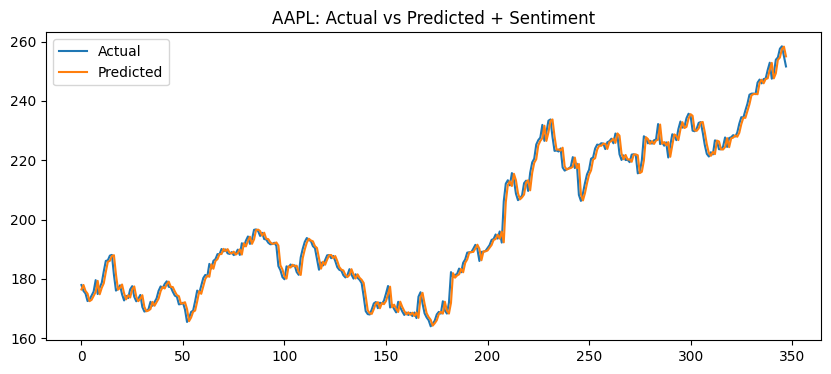

In [20]:
mse = mean_squared_error(y_test, pred)
print("MSE:", mse)

plt.figure(figsize=(10,4))
plt.plot(y_test.values, label='Actual')
plt.plot(pred, label='Predicted')
plt.title(f"{ticker}: Actual vs Predicted + Sentiment")
plt.legend()
plt.show()